# Projet Stratégies d'Investissement Alternatives et Quantitatives
## Jérémy Bellina, Joël Zhu

# Set up all packages and information

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [23]:
# load the crypto prices csv data
crypto_prices = pd.read_csv("crypto_prices.csv", parse_dates=[0])
crypto_prices.set_index('date', inplace=True)

# load the CRIX index csv data
crix_prices = pd.read_csv("vcrix.csv", parse_dates=[0])
crix_prices.set_index('date', inplace=True)
crix_prices = crix_prices.drop(["Unnamed: 0", "n"], axis=1)
crix_prices = crix_prices.loc["2018-04-01":]

# load the Fama & French momentum factor csv data
FFMomentum = pd.read_csv("F-F_Momentum_Factor_daily.CSV", parse_dates=[0])
FFMomentum = FFMomentum.rename(columns={'Unnamed: 0': 'date'})
FFMomentum.set_index('date', inplace=True)
FFMomentum = FFMomentum.loc["2018-04-01":]

# load the Fama & French research data factor csv data
FFResearch = pd.read_csv("F-F_Research_Data_Factors_daily.CSV", parse_dates=[0])
FFResearch = FFResearch.rename(columns={'Unnamed: 0': 'date'})
FFResearch.set_index('date', inplace=True)
FFResearch = FFResearch.loc["2018-04-01":]

In [3]:
# create rebalancing dates array
rebalancing_dates = pd.date_range(start = "2018-04-01", end = "2020-05-01", freq = pd.DateOffset(months=1, day = 1))
formatted_dates = pd.date_range(start = "2018-04-01", end = "2020-05-26")

In [50]:
# horizon
horizon = 15
#initial value
initial_value = 100

# Helper functions

In [47]:
def sort_returns(current_date, data, past_horizon):
    start_date = str(current_date.date() - pd.to_timedelta(past_horizon, unit='d'))
    end_date = str(current_date.date())
    returns = (data.loc[end_date] - data.loc[start_date])/data.loc[start_date]
    # We sort those returns
    sorted_returns = returns.sort_values(ascending=False)
    
    return sorted_returns

In [48]:
def sort_all_returns(data, past_horizon):
    returns = data.pct_change(periods=past_horizon)
    
    return returns

In [6]:
def compute_value(date, portfolio, crypto_prices):
    value = 0
    for item in portfolio:
        value += item[1] * crypto_prices.loc[date, item[0]]
    return value

In [7]:
def update_portfolio(amount, data, date, crypto_names):
    portfolio = []
    for name in crypto_names:
        portfolio.append((name, amount / data.loc[date, name]))
    return portfolio

# Portfolio backtests

Creates portfolio long on all crypto currencies **equally weighted**

In [8]:
def get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, data, portfolio_index):
    values = []
    for date in formatted_dates:
        values.append(compute_value(date, portfolio, data)) # update values
        if date in rebalancing_dates:
            sorted_returns = sort_returns(date, data, horizon) # compute returns and sort
            crypto_names = sorted_returns.iloc[(10 * (portfolio_index - 1)):(10 * portfolio_index)].index # extract crypto
            portfolio = update_portfolio(values[-1] / 10, data, date, crypto_names) # update composition

    return values[1:]

Creates a portfolio **long on best returns** crypto currencies and **short on lowest returns** ones

In [9]:
 def long_short_strategy(ptf_values1, ptf_values5):
    values = []
    for value1, value5 in zip(ptf_values1, ptf_values5):
        values.append(value1 - value5)
    return values

# Plot of portfolios values 

,P1,P2,P3,P4,P5
Date,,,,,
2018-04-28,225.850661,210.943504,195.577079,191.232295,171.252385
2018-04-29,241.126423,214.562712,196.101291,196.766949,178.218006
2018-04-30,227.398676,206.214284,188.466030,189.219656,174.880879
2018-05-01,227.398676,206.214284,188.466030,189.219656,174.880879
2018-05-02,238.073171,217.089075,192.926403,195.873964,184.038336


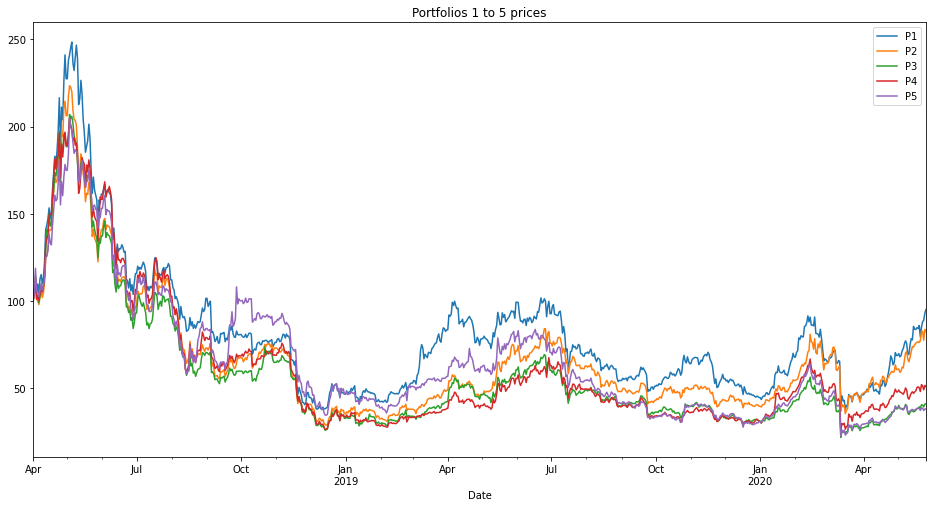

In [54]:
ptf_values1 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 1)
ptf_values2 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 2)
ptf_values3 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 3)
ptf_values4 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 4)
ptf_values5 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 5)

all_ptf_values = pd.DataFrame(data = {'Date': formatted_dates, 'P1': ptf_values1, 'P2': ptf_values2, 'P3': ptf_values3, 'P4': ptf_values4, 'P5': ptf_values5})
all_ptf_values.set_index('Date', inplace=True)

all_ptf_rets.plot(figsize=(16,8), title="Portfolios 1 to 5 prices")
all_ptf_rets.loc["2018-04-28":"2018-05-02"]

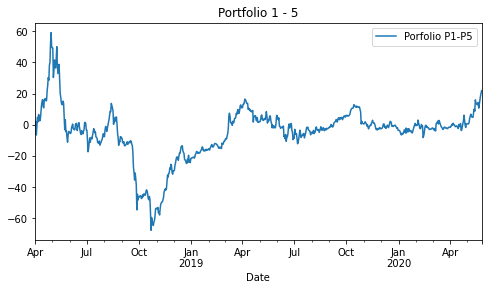

In [11]:
ptf_values1 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 1)
ptf_values5 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 5)
final_values = long_short_strategy(ptf_values1, ptf_values5)

ptf_values = pd.DataFrame(data = {'Date': formatted_dates, 'Porfolio P1-P5': final_values})
ptf_values.set_index('Date', inplace=True)
ptf_values.plot(figsize=(8,4), title="Portfolio 1 - 5")

# Statistical description

## Initialization

In [12]:
# We get all the values of the 5 portfolios
ptf_values1 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 1)
ptf_values2 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 2)
ptf_values3 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 3)
ptf_values4 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 4)
ptf_values5 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 5)

## Mean

In [13]:
# We compute the mean for all portfolios returns
mean1 = np.mean(ptf_values1.pct_change())
mean2 = np.mean(ptf_values2)
mean3 = np.mean(ptf_values3)
mean4 = np.mean(ptf_values4)
mean5 = np.mean(ptf_values5)

# As we use portfolios values, in order to get the mean return we have to compute (mean_value - initial_value)/initial_value
mean_return1 = (mean1 - initial_value)/initial_value
mean_return2 = (mean2 - initial_value)/initial_value
mean_return3 = (mean3 - initial_value)/initial_value
mean_return4 = (mean4 - initial_value)/initial_value
mean_return5 = (mean5 - initial_value)/initial_value

print("Mean return of portfolio 1: {}".format(mean_return1))
print("Mean return of portfolio 2: {}".format(mean_return2))
print("Mean return of portfolio 3: {}".format(mean_return3))
print("Mean return of portfolio 4: {}".format(mean_return4))
print("Mean return of portfolio 5: {}".format(mean_return5))

Mean return of portfolio 1: -0.2874855726027667
Mean return of portfolio 2: -0.39381186296874937
Mean return of portfolio 3: -0.33642315257050615
Mean return of portfolio 4: -0.4554469448759715
Mean return of portfolio 5: -0.23879186162270286


## Standard deviation

In [14]:
# We compute the standard deviation for all portfolios returns
stddev1 = np.std(ptf_values1)
stddev2 = np.std(ptf_values2)
stddev3 = np.std(ptf_values3)
stddev4 = np.std(ptf_values4)
stddev5 = np.std(ptf_values5)


## Median

In [15]:
# We compute the median for all portfolios returns
median1 = np.median(ptf_values1)
median2 = np.median(ptf_values2)
median3 = np.median(ptf_values3)
median4 = np.median(ptf_values4)
median5 = np.median(ptf_values5)

# As we use portfolios values, in order to get the median return we have to compute (initial_value - mean_value)/initial_value
median_return1 = (median1 - initial_value)/initial_value
median_return2 = (median2 - initial_value)/initial_value
median_return3 = (median3 - initial_value)/initial_value
median_return4 = (median4 - initial_value)/initial_value
median_return5 = (median5 - initial_value)/initial_value

print("Median return of portfolio 1: {}".format(median_return1))
print("Median return of portfolio 2: {}".format(median_return2))
print("Median return of portfolio 3: {}".format(median_return3))
print("Median return of portfolio 4: {}".format(median_return4))
print("Median return of portfolio 5: {}".format(median_return5))

Median return of portfolio 1: -0.3781349795121834
Median return of portfolio 2: -0.546719937730325
Median return of portfolio 3: -0.4587782888092859
Median return of portfolio 4: -0.5870482898622229
Median return of portfolio 5: -0.3699409807516036


## Minimum

In [16]:
# We get the minimum for all portfolios returns
min1 = np.min(ptf_values1)
min2 = np.min(ptf_values2)
min3 = np.min(ptf_values3)
min4 = np.min(ptf_values4)
min5 = np.min(ptf_values5)

## Maximum

In [17]:
# We get the max for all portfolios returns
max1 = np.max(ptf_values1)
max2 = np.max(ptf_values2)
max3 = np.max(ptf_values3)
max4 = np.max(ptf_values4)
max5 = np.max(ptf_values5)

# Performance measures

## Initialization

In [33]:
ptf_values1 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 1)
ptf_values2 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 2)
ptf_values3 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 3)
ptf_values4 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 4)
ptf_values5 = get_portfolio_prices(initial_value, horizon, formatted_dates, rebalancing_dates, crypto_prices, 5)

all_ptf_values = pd.DataFrame(data = {'date': formatted_dates, 'P1': ptf_values1, 'P2': ptf_values2, 'P3': ptf_values3, 'P4': ptf_values4, 'P5': ptf_values5})
all_ptf_values.set_index('date', inplace=True)

all_ptf_pct_change = all_ptf_values.pct_change()
all_ptf_rets = 1+ all_ptf_pct_change
all_ptf_rets.iloc[0,:] = 1
all_ptf_rets = all_ptf_rets.cumprod()

## Sharpe

In [34]:
P1_num = (all_ptf_rets["P1"] - FFResearch['RF']).dropna()
P1_denom = np.std(all_ptf_rets["P1"])
print(np.mean(P1_num)/P1_denom)

P2_num = (all_ptf_rets["P2"] - FFResearch['RF']).dropna()
P2_denom = np.std(all_ptf_rets["P2"])
print(np.mean(P2_num)/P2_denom)

P3_num = (all_ptf_rets["P3"] - FFResearch['RF']).dropna()
P3_denom = np.std(all_ptf_rets["P3"])
print(np.mean(P3_num)/P3_denom)

P4_num = (all_ptf_rets["P4"] - FFResearch['RF']).dropna()
P4_denom = np.std(all_ptf_rets["P4"])
print(np.mean(P4_num)/P4_denom)

P5_num = (all_ptf_rets["P5"] - FFResearch['RF']).dropna()
P5_denom = np.std(all_ptf_rets["P5"])
print(np.mean(P5_num)/P5_denom)

1.8365990088995638
1.5481520217007478
1.8704384941724919
1.4329038611083307
2.219308792627386


## Treynor

In [35]:
R_Rf = (all_ptf_pct_change["P1"] - FFResearch['RF']).dropna()
crix_rets = crix_prices.pct_change()

Rm_Rf = (crix_rets["vcrix"] - FFResearch['RF']).dropna()

print(R_Rf)
print(Rm_Rf)

intercept = sm.add_constant(Rm_Rf)
reg = sm.OLS(R_Rf, intercept).fit()

print(reg.summary())

date
2018-04-02    0.059990
2018-04-03    0.039940
2018-04-04   -0.074984
2018-04-05    0.045866
2018-04-06   -0.057158
                ...   
2020-04-24    0.069804
2020-04-27   -0.050399
2020-04-28    0.019200
2020-04-29    0.098714
2020-04-30   -0.020823
Length: 525, dtype: float64
date
2018-04-02   -0.035106
2018-04-03   -0.010759
2018-04-04    0.018094
2018-04-05    0.060813
2018-04-06    0.038919
                ...   
2020-04-24   -0.070404
2020-04-27    0.011541
2020-04-28   -0.028233
2020-04-29   -0.000973
2020-04-30   -0.041094
Length: 525, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2878
Date:                Fri, 05 Mar 2021   Prob (F-statistic):              0.592
Time:                        11:1

## Jensen